# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [ ]:
!pip install prophet

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from prophet import Prophet

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [54]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/fb_prophet/googletrend_data_science_2004_nowdays_USA.csv',header=1)
df.head(10)

,Mois,data science: (États-Unis)
0,2004-01,20
1,2004-02,11
2,2004-03,14
3,2004-04,0
4,2004-05,7
5,2004-06,10
6,2004-07,18
7,2004-08,5
8,2004-09,11
9,2004-10,9


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format. 

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [57]:
df.columns=['ds','y']
df.ds = pd.to_datetime(df.ds, format='%Y-%m')

## Plotting the data

👇 Plot the data

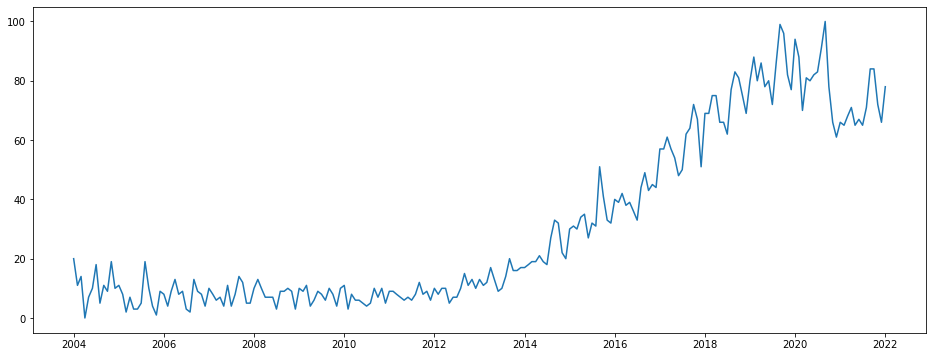

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(df.ds,df.y)

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split

In [70]:
proportion_train = 0.8
cut = int(len(df)*proportion_train)
df_train, df_test = df[:cut],df[cut:]

In [79]:
from fbprophet import Prophet
m = Prophet()
m.fit(df_train)
# Your code here

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [81]:
future = m.make_future_dataframe(periods=len(df_test),freq='MS')
future
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
212,2021-09-01,111.748030,105.718977,117.960115
213,2021-10-01,109.858384,103.666688,116.175959
214,2021-11-01,109.713719,103.766273,116.123538
215,2021-12-01,107.555851,101.637591,114.004285
216,2022-01-01,114.144930,107.723235,120.597175


## Plotting the forecast

👇 It's time to visualize our forecast. Make use of the handy [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

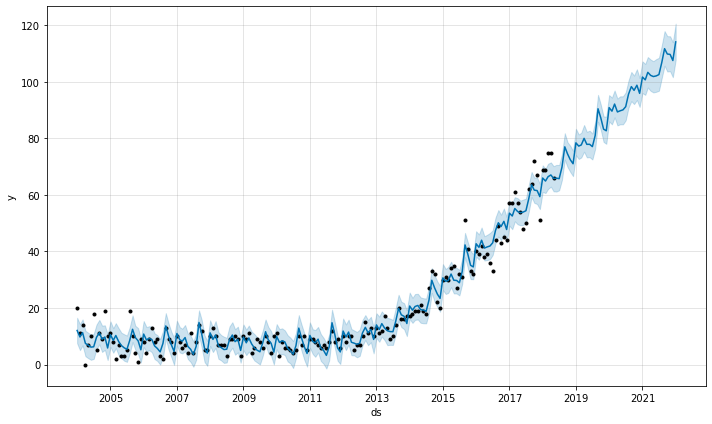

In [88]:
m.plot(forecast);


👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

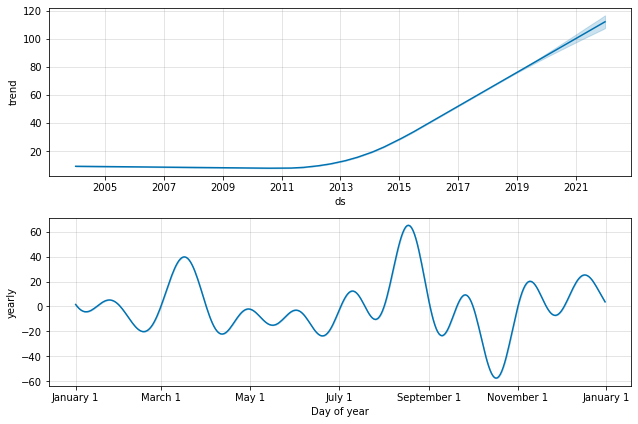

In [89]:
fig2 = m.plot_components(forecast)

## Evaluating the model with cross-validation!

👇 Using `cross_validation` and `performance_metrics` from [fbprophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model
<img src='https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png'>

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

In [91]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
df_cv = cross_validation(m, initial='5 Y', period='180 days', horizon = '1 Y')

INFO:fbprophet:Making 17 forecasts with cutoffs between 2009-06-11 18:10:48 and 2017-04-30 18:10:48


  0%|          | 0/17 [00:00<?, ?it/s]

In [92]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days 05:49:12,10.596661,3.255251,2.408889,0.189394,0.119121,0.85
1,39 days 05:49:12,10.020514,3.165520,2.327626,0.195868,0.137793,0.85
2,40 days 05:49:12,10.284048,3.206875,2.376745,0.193475,0.137793,0.85
3,44 days 05:49:12,11.230214,3.351151,2.566412,0.202121,0.168874,0.80
4,45 days 05:49:12,12.799561,3.577647,2.711646,0.201410,0.168874,0.75


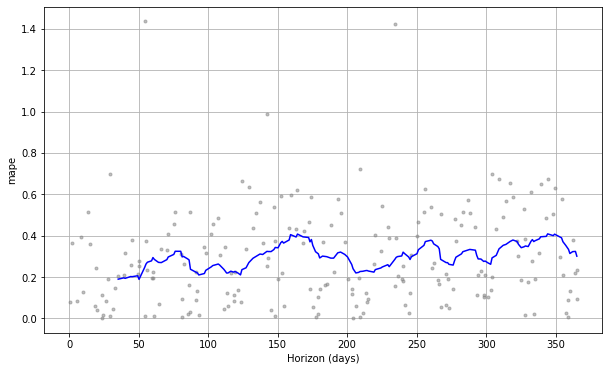

In [97]:
# Plot results below
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

⚠️ Don't forget to push the challenge to GitHub once you're done 😄